In [1]:
#@title Installing needed dependencies!
from IPython.display import clear_output
try:
    from flair.models import TextClassifier
    from flair.data import Sentence
    from tqdm import tqdm
    import os
    import sys
    import pandas as pd
    from pysentimiento import create_analyzer

    print("Modules required are already installed!")
except ModuleNotFoundError:
    %pip install flair
    clear_output()
    %pip install tqdm
    clear_output()
    %pip install pandas
    clear_output()
    %pip install pysentimiento
    clear_output()
    print("All modules required were sucessfully installed!")

All modules required were sucessfully installed!


In [2]:
#@title Load model

from flair.models import TextClassifier
from flair.data import Sentence
from tqdm import tqdm
import os
import sys
import pandas as pd
from pysentimiento import create_analyzer
import matplotlib.pyplot as plt


# Initialize Flair Sentiment Classifier
classifier = TextClassifier.load('en-sentiment')

2023-05-08 18:09:29,353 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmpyv75pkg2


100%|██████████| 253M/253M [00:21<00:00, 12.1MB/s]

2023-05-08 18:09:52,036 copying /tmp/tmpyv75pkg2 to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2023-05-08 18:09:52,577 removing temp file /tmp/tmpyv75pkg2


100%|██████████| 7378/7378 [01:11<00:00, 102.70it/s]


,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sentiment
0,0,5048bbd6-6987-4e30-8f18-4ddf711f3293,Jerenee Charles,https://play-lh.googleusercontent.com/a-/ACB-R...,Datacamp is one of my favorite programs for ga...,5,0,75.0.0,2023-03-24 21:09:12,NaN,NaN,POSITIVE
1,1,1e104afb-9b6d-4954-b84a-36c0a8bf7b7d,Oluwadare Fagbamigbe,https://play-lh.googleusercontent.com/a-/ACB-R...,Very easy to use.,4,0,NaN,2023-03-24 11:23:15,NaN,NaN,POSITIVE
2,2,401c3215-d3c7-4c3c-8608-478ca18ec1b4,Bence Zaupper,https://play-lh.googleusercontent.com/a/AGNmyx...,"Great app, enabled me to solve coding exercise...",5,0,73.0.0,2023-03-22 20:41:13,NaN,NaN,POSITIVE
3,3,4a3e6b48-290f-4ba9-a9fa-3b73672571b5,Chioma Ebe,https://play-lh.googleusercontent.com/a-/ACB-R...,Its quite easy to understand,5,0,69.0.0,2023-03-22 11:17:38,NaN,NaN,POSITIVE
4,4,5c0fc7ca-e754-411d-aebf-990824ab04b2,Sundiata Keita,https://play-lh.googleusercontent.com/a-/ACB-R...,Still learning but so far it's 👍 good,5,0,75.0.0,2023-03-22 10:21:34,NaN,NaN,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...
7373,7373,fc41747a-be51-4f84-8436-263f059e35b0,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Awesome app! Addictive stuff!,5,1,1.0.1,2017-10-19 03:34:20,NaN,NaN,POSITIVE
7374,7374,b24effa7-b70e-4b98-98f6-135121b702cc,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Great app. Good learning tool.,5,0,1.0.2,2017-10-18 15:34:18,NaN,NaN,POSITIVE
7375,7375,fe8918da-472f-425c-8067-56fff31850de,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Great sense for detail! Perfect to start codin...,5,0,1.0.2,2017-10-18 14:19:59,NaN,NaN,POSITIVE
7376,7376,e6fd6b37-325b-44ad-8066-45208f701c66,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Great app! Like Duolingo but for learning Data...,5,2,1.0.1,2017-10-18 13:54:11,NaN,NaN,POSITIVE


<ipython-input-3-d1ca679460e7>:53: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = df.groupby('sentiment').mean().reset_index()


count         7378
unique           2
top       POSITIVE
freq          6186
Name: sentiment, dtype: object
POSITIVE    6186
NEGATIVE    1192
Name: sentiment, dtype: int64


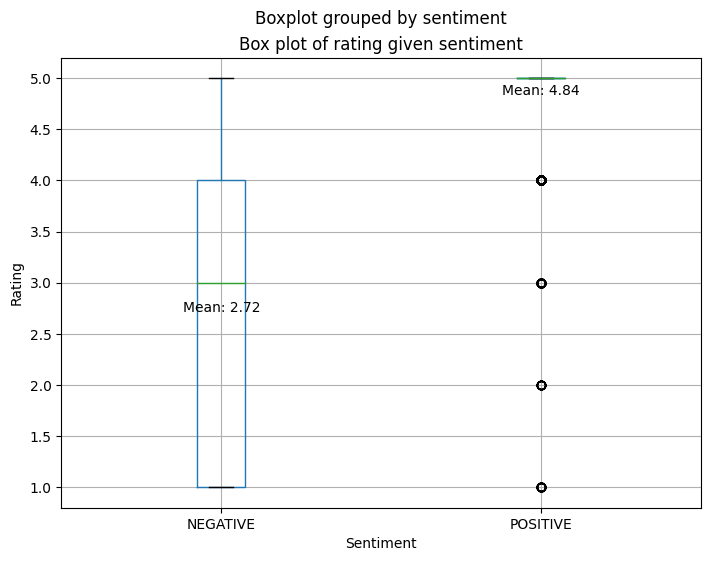

In [3]:
#@title App Reviews with Sentiment- English [(model here)](https://github.com/flairNLP/flair)

#@markdown * ### Pick store:
store = "Google Play Store" #@param ["App Store", "Google Play Store"]
#@markdown * ### Pick app: 
app = "datacamp" #@param ["codeacademy", "datacamp", "encode", "learn-python-programiz", "mimo", "programming-hero", "programming-hub", "python-x", "sololearn"]

dir = "https://raw.githubusercontent.com/lopezbec/AI_Gamification_Python/main/reviews/review-files/"

if store == "App Store":
    input_file = "applestore-review-" + app + ".csv"
else:
    input_file = "googleplay-review-" + app + ".csv"

# Load the CSV file into a dataframe
df = pd.read_csv(dir + input_file)

if input_file.endswith(".csv"):
# Loop over each row in the dataframe and predict sentiment for the review content
    sentiments = []
    if input_file.startswith("applestore"):
        for content in tqdm(df['review']):
            try:
                sentence = Sentence(content)
                classifier.predict(sentence)
                sentiment = sentence.labels[0].value
                sentiments.append(sentiment)
                df['sentiment']=sentiments
            except:
                continue

    else:
        for content in tqdm(df['content']):
            try:
                sentence = Sentence(content)
                classifier.predict(sentence)
                sentiment = sentence.labels[0].value
                sentiments.append(sentiment)
                df['sentiment']=sentiments
            except:
                continue

#@markdown * ### Display data?
visualize = "Yes" #@param ["Yes", "No"]
if visualize == "Yes":
    display(df)
    print(df['sentiment'].describe())
    print(df['sentiment'].value_counts())

        # Create a box plot of rating given sentiment
    ax = df.boxplot(column='score', by='sentiment', figsize=(8,6))
    # Add mean value to each box plot
    means = df.groupby('sentiment').mean().reset_index()
    for i, mean in means.iterrows():
        ax.text(i+1, mean['score'], f"Mean: {mean['score']:.2f}", horizontalalignment='center')
    plt.title('Box plot of rating given sentiment')
    plt.xlabel('Sentiment')
    plt.ylabel('Rating')
    plt.show()
else:
    print("No display")
#@markdown * ### Save to csv?
csv = "Yes" #@param ["Yes", "No"]
if csv == "Yes":
    # Get the output file name by appending "_sentiment" before the file extension
    output_file = os.path.splitext(input_file)[0] + "_sentiment.csv"
    # Save the new CSV file with sentiment column
    df.to_csv(output_file, index=False)
else:
    print("No export")


100%|██████████| 389/389 [00:07<00:00, 55.19it/s]


,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,language,sentiment
0,1,2a825b44-a4e7-4e6b-948c-218f21871b73,Esmeralda Cáceres Patricio,https://play-lh.googleusercontent.com/a/AGNmyx...,"Muy didáctico, muy útil para empezar con lo bá...",4,0,77.0.1,2023-05-01 16:35:48,NaN,NaN,77.0.1,es,POS
1,3,66fa2dcd-a64e-483e-8146-8a6d36cfc9c6,augusto altamirano,https://play-lh.googleusercontent.com/a/AGNmyx...,Excelente contenido y aplicación.,5,0,75.0.0,2023-04-29 00:29:38,NaN,NaN,75.0.0,es,POS
2,4,fa0de8f5-7085-43a6-a983-18240e88d371,Marco Polo Elizais Castillo,https://play-lh.googleusercontent.com/a-/ACB-R...,Perfecta para aumentar los skills 👌,5,0,77.0.0,2023-04-27 03:51:36,NaN,NaN,77.0.0,es,POS
3,5,e63f4520-fab5-4d27-a545-5394e737e806,Dani Prado,https://play-lh.googleusercontent.com/a-/ACB-R...,Genial pero sin modo offline :(,4,0,75.0.0,2023-04-23 13:14:33,NaN,NaN,75.0.0,es,NEG
4,8,923bc0f3-0038-4aa5-b3f5-fdc88787ee36,Andres Lomonaco,https://play-lh.googleusercontent.com/a-/ACB-R...,Realice el track de Python y no fue muy bueno ...,1,0,75.0.0,2023-04-08 09:37:19,"Hey Andres,\n\nThank you for reaching out to D...",2023-04-09 00:26:49,75.0.0,es,NEG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,735,4df2048c-8814-40aa-970a-97ff42fd3a93,Un usuario de Google,https://play-lh.googleusercontent.com/EGemoI2N...,La mejor aplicación para el aprendizaje del an...,5,3,1.0.5,2018-05-09 17:20:53,NaN,NaN,1.0.5,es,POS
385,736,c1ef0f04-5590-405f-95da-71fb9021da13,Un usuario de Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ampliar contenido,5,0,1.0.4,2018-04-17 08:02:33,NaN,NaN,1.0.4,es,NEU
386,737,57f2e269-8fff-4d22-b9ce-33385855715b,Un usuario de Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Excelente, nada mas que decir.",5,1,1.0.4,2018-04-07 02:47:21,NaN,NaN,1.0.4,es,POS
387,738,448ee586-54dc-4dfc-aaae-ab21f816355c,Un usuario de Google,https://play-lh.googleusercontent.com/EGemoI2N...,La app es fantástica. Sería bueno que le agreg...,5,4,1.0.4,2018-03-30 15:40:32,NaN,NaN,1.0.4,es,POS


<ipython-input-4-c078dc6f3e95>:38: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = df.groupby('sentiment').mean().reset_index()


count     389
unique      3
top       POS
freq      306
Name: sentiment, dtype: object
POS    306
NEU     49
NEG     34
Name: sentiment, dtype: int64


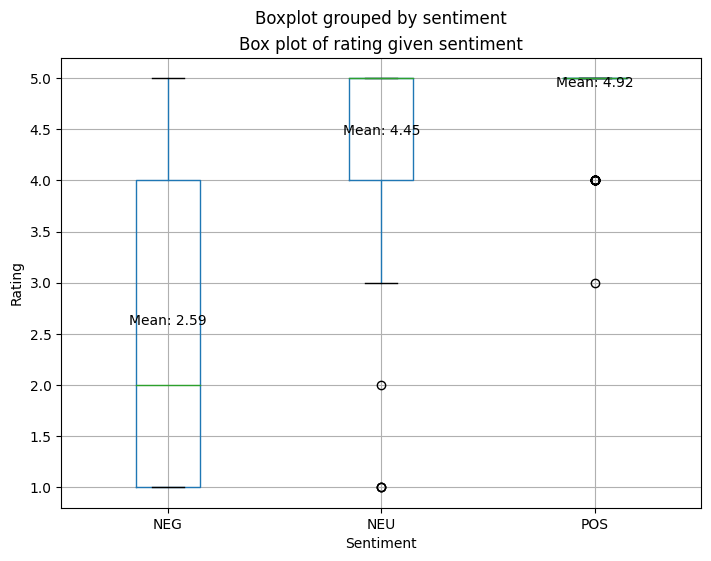

In [4]:
#@title App Reviews with Sentiment- Spanish [(model here)](https://github.com/pysentimiento/pysentimiento/)

#@markdown * ### Pick store:
#@markdown Only Google Play Store Reviews were capture in Spanish due to the limitation of the API
#@markdown * ### Pick app: 
app = "datacamp" #@param ["codeacademy", "datacamp", "learn-python-programiz", "mimo", "programming-hero", "programming-hub", "sololearn"]

dir = "https://raw.githubusercontent.com/lopezbec/AI_Gamification_Python/main/reviews/review-files-Spanish/"

input_file = app + "_Spanish.csv"

# Load the CSV file into a dataframe
df = pd.read_csv(dir + input_file)

if input_file.endswith(".csv"):
# Loop over each row in the dataframe and predict sentiment for the review content
    sentiments = []
    analyzer = create_analyzer(task="sentiment", lang="es")
    
    for content in tqdm(df['content']):
        try:
            output=analyzer.predict(content)
            sentiments.append(output.output)
            df['sentiment']=sentiments
        except:
            continue

#@markdown * ### Display data?
visualize = "Yes" #@param ["Yes", "No"]
if visualize == "Yes":
    display(df)
    print(df['sentiment'].describe())
    print(df['sentiment'].value_counts())

        # Create a box plot of rating given sentiment
    ax = df.boxplot(column='score', by='sentiment', figsize=(8,6))
    # Add mean value to each box plot
    means = df.groupby('sentiment').mean().reset_index()
    for i, mean in means.iterrows():
        ax.text(i+1, mean['score'], f"Mean: {mean['score']:.2f}", horizontalalignment='center')
    plt.title('Box plot of rating given sentiment')
    plt.xlabel('Sentiment')
    plt.ylabel('Rating')
    plt.show()
else:
    print("No display")
#@markdown * ### Save to csv?
csv = "Yes" #@param ["Yes", "No"]
if csv == "Yes":
    # Get the output file name by appending "_sentiment" before the file extension
    output_file = os.path.splitext(input_file)[0] + "_sentiment.csv"
    # Save the new CSV file with sentiment column
    df.to_csv(output_file, index=False)
else:
    print("No export")


